In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from pandas import value_counts
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv("cars_cleaned.csv")
df.sample(10)

,Numer VIN,Model,Rok produkcji,Paliwo,Typ nadwozia,Przebieg,Kolor,Poj. silnika,Stan techniczny,Skrzynia biegów,...,Kierownica,Cena,Lokalizacja,Województwo,Tytuł,Rodzaj ogłoszenia,Link,Producent,Opis,Czy cena do negocjacji
4655,NaN,107,2012,Benzyna,Hatchback,179727,Biały,1000.0,Nieuszkodzony,Manualna,...,NaN,8000.0,Mikstat,Wielkopolskie,Peugeot 107/citroen C1/toyota aygo 2012r,Prywatne,https://www.olx.pl/d/oferta/peugeot-107-citroe...,Peugeot,Witam mam Państwu do zaoferowania\nPeugeot 107...,True
7200,TMBPC26Y674182799,Fabia,2007,Benzyna,Hatchback,250000,Żółty – Złoty,1390.0,Nieuszkodzony,Manualna,...,po lewej,3999.0,Gliwice Sośnica,Śląskie,"Skoda Fabia 1,4 16V 2007r!Klima Elektryka!Dług...",Prywatne,https://www.olx.pl/d/oferta/skoda-fabia-1-4-16...,Skoda,"Witam.\nSprzedam Skoda Fabia 1,4 16V 2007 r z ...",False
5506,NaN,Seria 3,2006,Diesel,Kombi,390000,Inny kolor,2000.0,Nieuszkodzony,Manualna,...,po lewej,9500.0,Stargard,Zachodniopomorskie,BMW E91 320d 163km-mozliwa zamiana,Prywatne,https://www.olx.pl/d/oferta/bmw-e91-320d-163km...,BMW,Bmw 320d 163konie. Silnik ma pełną moc i chodz...,False
9472,NaN,Aygo,2014,Benzyna,Hatchback,150000,Niebieski,1000.0,Nieuszkodzony,Automatyczna,...,po lewej,26700.0,Prabuty,Pomorskie,Toyota Aygo - automat / świetny stan!,Prywatne,https://www.olx.pl/d/oferta/toyota-aygo-automa...,Toyota,"Toyota Aygo po liftingu, z automatyczną skrzyn...",False
5674,NaN,Passat,2007,Diesel,Kombi,370000,Czarny,1900.0,Nieuszkodzony,Manualna,...,po lewej,6599.0,Suwałki,Podlaskie,Passat b6 1.9 tdi,Prywatne,https://www.olx.pl/d/oferta/passat-b6-1-9-tdi-...,Volkswagen,"Dzień dobry,\n\nŚwieże ubezpieczenie i przeglą...",True
371,WOLPD6EBXE1107346,Astra,2014,LPG,Hatchback,195000,Brązowy – Beżowy,1398.0,Nieuszkodzony,Manualna,...,po lewej,24900.0,Gorzów Wielkopolski,Lubuskie,"Opel Astra 1,4 z LPG zakup od nowego w krajowy...",Prywatne,https://www.olx.pl/d/oferta/opel-astra-1-4-z-l...,Opel,"Sprzedam Opel Astra 1,4 J turbo benzyna + LPG,...",True
9168,VF77JBHY6HJ872937,Berlingo,2018,Diesel,Minibus,124540,Szary,1560.0,Nieuszkodzony,Manualna,...,po lewej,41900.0,Ryki,Lubelskie,Citroen Berlingo Multispace 1.6 HDI,Prywatne,https://www.olx.pl/d/oferta/citroen-berlingo-m...,Citroen,"Witam, mam do sprzedania bardzo fajne autko ja...",True
4184,WAUZZZ4L47D099136,SQ7,2007,Diesel,SUV,433100,Czarny,4200.0,Nieuszkodzony,Automatyczna,...,NaN,29000.0,Koszalin,Zachodniopomorskie,Audi Q7 Quatro 4.2TDI 326KM Offroad. Niska cen...,Prywatne,https://www.olx.pl/d/oferta/audi-q7-quatro-4-2...,Audi,Sprzedaję swoje prywatne auto Audi 4.2TDI 326K...,False
4548,SALGA2JFXEA157569,Range Rover,2014,Diesel,SUV,320000,Biały,4367.0,Nieuszkodzony,Automatyczna,...,po prawej,109000.0,Tarnobrzeg,Podkarpackie,Land Rover Range Rover 4.4SD V8 Vogue,Firmowe,https://www.olx.pl/d/oferta/land-rover-range-r...,Land Rover,"Samochód z polskiego salonu, pierwszy właścici...",False
484,YV1SW58K921189567,V70,2001,Benzyna,Kombi,480000,Niebieski,2500.0,Nieuszkodzony,Automatyczna,...,po lewej,2500.0,Łódź Górna,Łódzkie,"Volvo V70 2.5T benzyna automat LPG , hak",Prywatne,https://www.olx.pl/d/oferta/volvo-v70-2-5t-ben...,Volvo,"Sprzedam samochód Volvo v70 , rok produkcji 20...",False


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10609 entries, 0 to 10608
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Numer VIN               3984 non-null   object 
 1   Model                   10609 non-null  object 
 2   Rok produkcji           10609 non-null  int64  
 3   Paliwo                  10609 non-null  object 
 4   Typ nadwozia            10609 non-null  object 
 5   Przebieg                10609 non-null  int64  
 6   Kolor                   10609 non-null  object 
 7   Poj. silnika            10609 non-null  float64
 8   Stan techniczny         10609 non-null  object 
 9   Skrzynia biegów         10609 non-null  object 
 10  Kraj pochodzenia        7535 non-null   object 
 11  Moc silnika             10609 non-null  float64
 12  Napęd                   8906 non-null   object 
 13  Kierownica              8402 non-null   object 
 14  Cena                    10609 non-null

In [43]:
df.describe()

,Rok produkcji,Przebieg,Poj. silnika,Moc silnika,Cena
count,10609.000000,10609.000000,10609.000000,10609.000000,10609.000000
mean,2009.508342,226942.358375,1918.461778,145.588368,28894.486442
std,5.504810,83339.398922,664.438592,67.422774,33299.045888
min,1990.000000,7000.000000,500.000000,20.000000,1000.000000
25%,2006.000000,170000.000000,1560.000000,105.000000,9000.000000
50%,2009.000000,226000.000000,1899.000000,132.000000,18800.000000
75%,2014.000000,280000.000000,2000.000000,167.000000,36000.000000
max,2024.000000,590000.000000,6500.000000,710.000000,500000.000000


In [44]:
for col in df:
    print(f'{col}: {df[col].isnull().sum()} brakujących danych')

Numer VIN: 6625 brakujących danych
Model: 0 brakujących danych
Rok produkcji: 0 brakujących danych
Paliwo: 0 brakujących danych
Typ nadwozia: 0 brakujących danych
Przebieg: 0 brakujących danych
Kolor: 0 brakujących danych
Poj. silnika: 0 brakujących danych
Stan techniczny: 0 brakujących danych
Skrzynia biegów: 0 brakujących danych
Kraj pochodzenia: 3074 brakujących danych
Moc silnika: 0 brakujących danych
Napęd: 1703 brakujących danych
Kierownica: 2207 brakujących danych
Cena: 0 brakujących danych
Lokalizacja: 0 brakujących danych
Województwo: 0 brakujących danych
Tytuł: 0 brakujących danych
Rodzaj ogłoszenia: 0 brakujących danych
Link: 0 brakujących danych
Producent: 0 brakujących danych
Opis: 0 brakujących danych
Czy cena do negocjacji: 0 brakujących danych


Kolumny zawierające atrybuty liczbowe nie mają braków, a braki w niektórych atrybutach kategorycznych można wypełnić odpowiednią informacją.
Niektóre numery VIN są z różnych względów wpisane niepoprawnie, można podjąć próbę odfiltrowania tychże numerów i skategoryzowanie ich wszystkich jako *Poprawne*, *Niepoprawne* lub *Brak danych*.

In [45]:
df["Kraj pochodzenia"] = df["Kraj pochodzenia"].fillna("Brak danych")
df["Napęd"] = df["Napęd"].fillna("Brak danych")
df["Kierownica"] = df["Kierownica"].fillna("Brak danych")

def is_VIN_number_valid(vin):
    vin = vin.strip().upper()
    if vin == "NAN":
        return "Brak danych"
    if not re.fullmatch(r"[A-HJ-NPR-Z0-9]{17}", vin):
        return "Niepoprawny"
    return "Poprawny"

df["Poprawność VIN"] = df["Numer VIN"].astype(str).apply(is_VIN_number_valid)

for col in df:
    print(f'{col}: {df[col].isnull().sum()} brakujących danych')

Numer VIN: 6625 brakujących danych
Model: 0 brakujących danych
Rok produkcji: 0 brakujących danych
Paliwo: 0 brakujących danych
Typ nadwozia: 0 brakujących danych
Przebieg: 0 brakujących danych
Kolor: 0 brakujących danych
Poj. silnika: 0 brakujących danych
Stan techniczny: 0 brakujących danych
Skrzynia biegów: 0 brakujących danych
Kraj pochodzenia: 0 brakujących danych
Moc silnika: 0 brakujących danych
Napęd: 0 brakujących danych
Kierownica: 0 brakujących danych
Cena: 0 brakujących danych
Lokalizacja: 0 brakujących danych
Województwo: 0 brakujących danych
Tytuł: 0 brakujących danych
Rodzaj ogłoszenia: 0 brakujących danych
Link: 0 brakujących danych
Producent: 0 brakujących danych
Opis: 0 brakujących danych
Czy cena do negocjacji: 0 brakujących danych
Poprawność VIN: 0 brakujących danych


In [46]:
atrybuty_ilosciowe = df.select_dtypes(include=['number'])
atrybuty_ilosciowe.nunique()

Rok produkcji      35
Przebieg         3175
Poj. silnika      448
Moc silnika       335
Cena             1170
dtype: int64

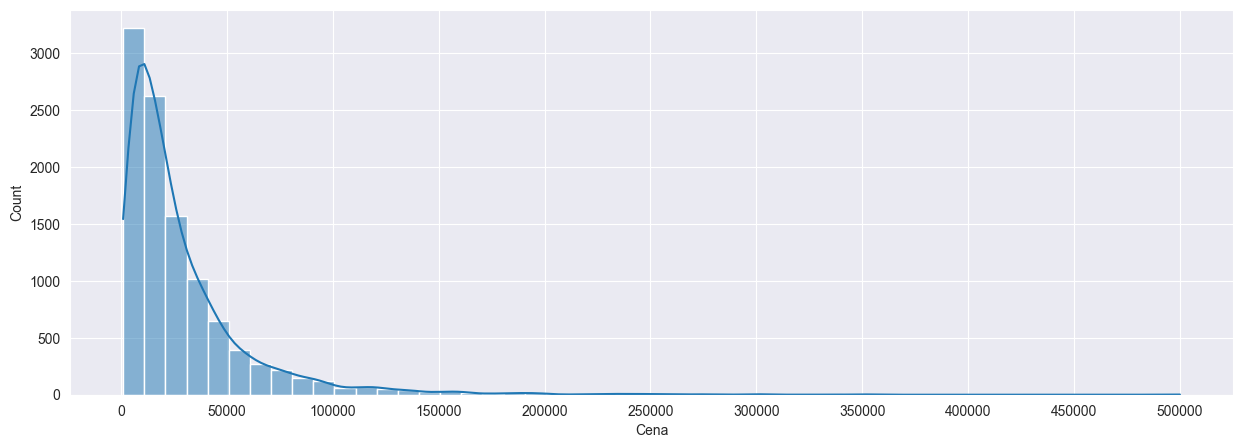

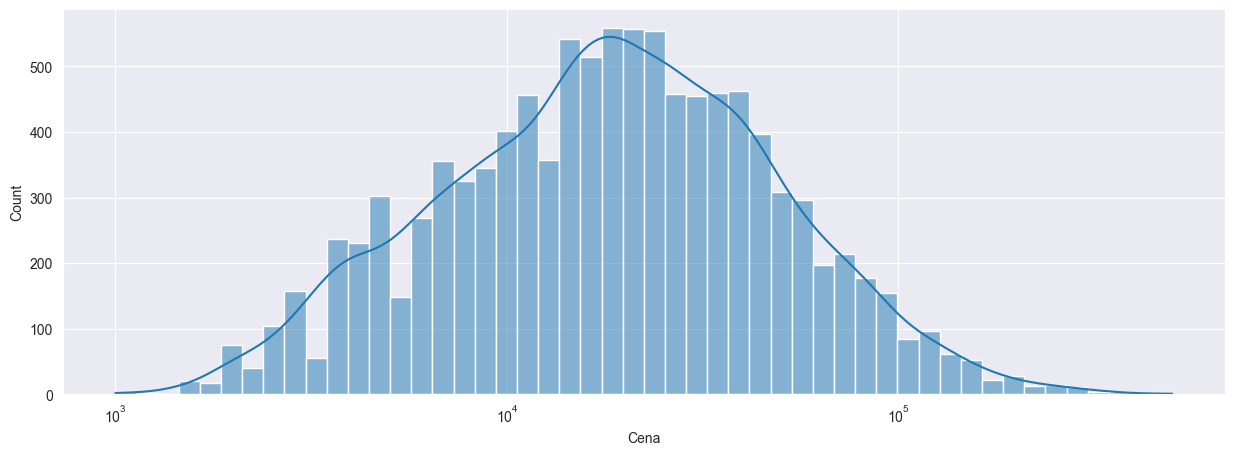

In [47]:
plt.figure(figsize=(15, 5))
plt.xticks(np.arange(0, 500001, step=50000))
sns.histplot(x=df["Cena"],bins=50, kde=True)
plt.show()
plt.figure(figsize=(15, 5))
sns.histplot(x=df["Cena"],bins=50, kde=True, log_scale=True)
plt.show()

Widać wyraźną lewoskośność histogramu, a zdecydowana większość aut kosztuje nie więcej niż 100000 złotych.

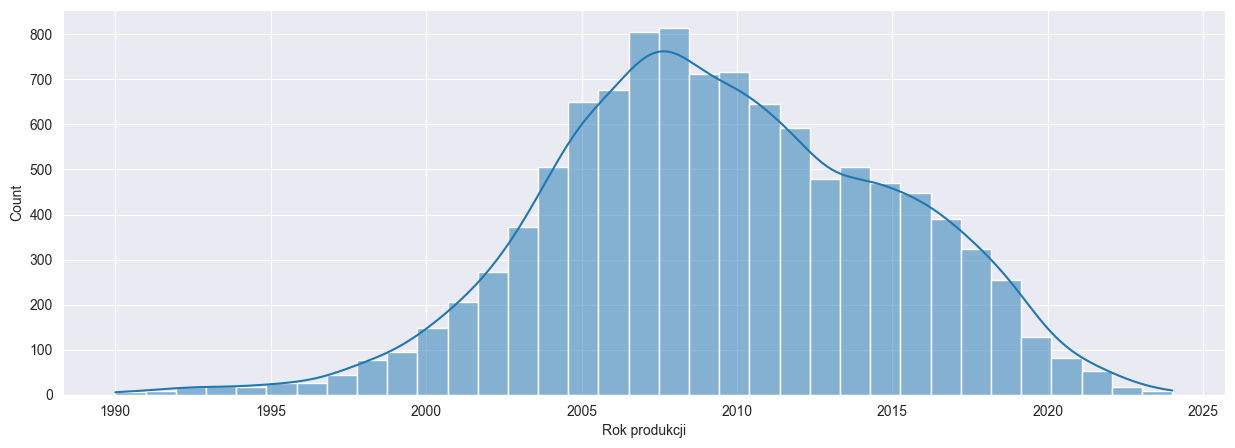

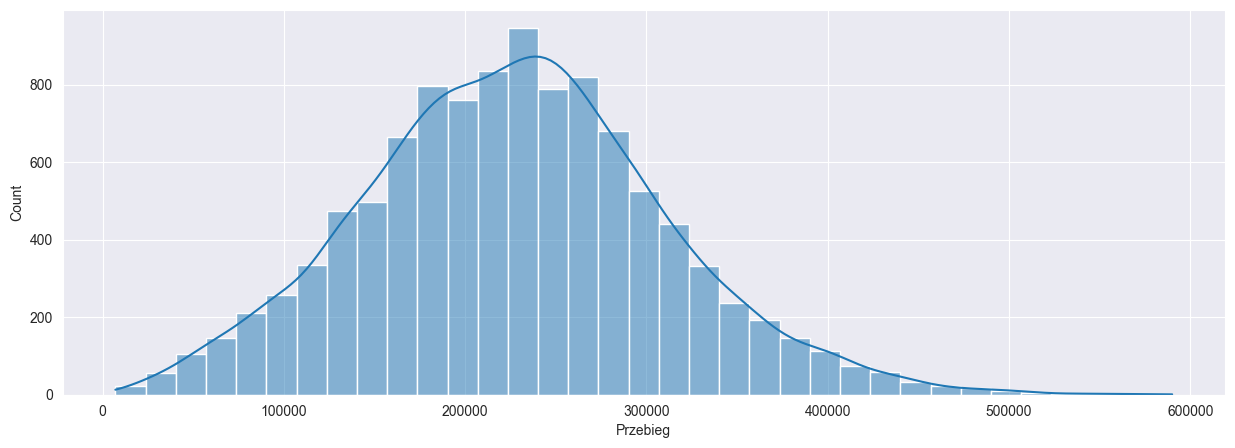

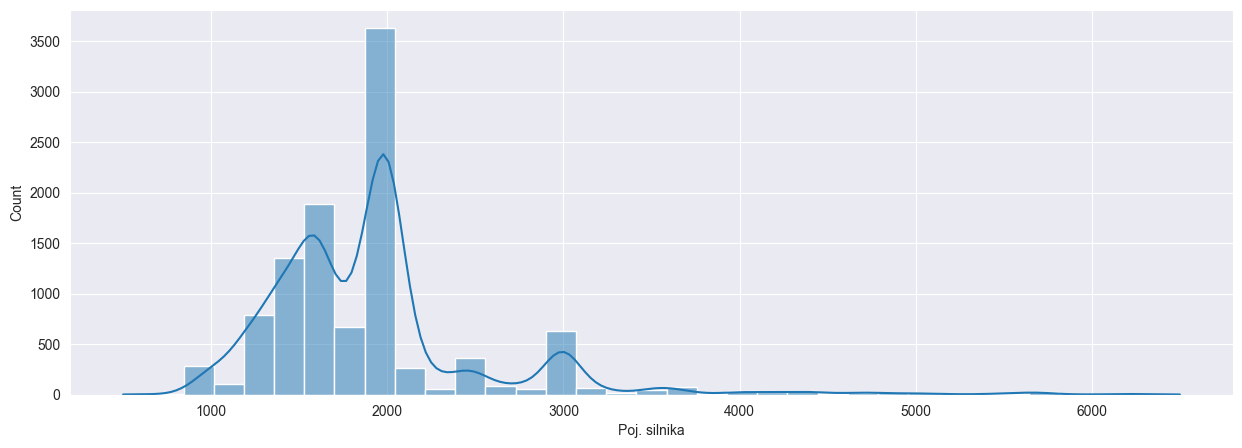

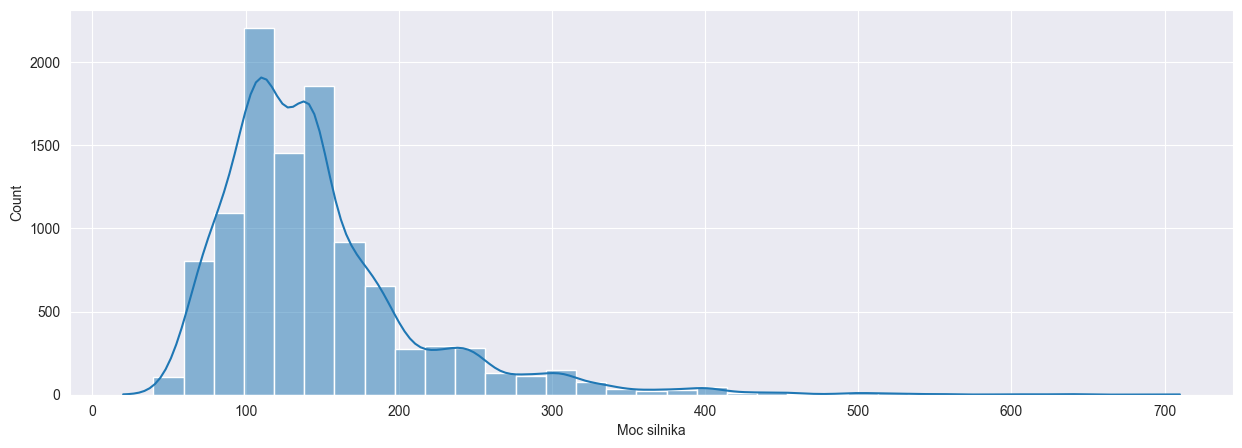

In [48]:
atrybuty_ilosciowe_bez_ceny=atrybuty_ilosciowe.drop(columns=["Cena"])
for i in atrybuty_ilosciowe_bez_ceny.columns:
    plt.figure(figsize=(15, 5))
    sns.histplot(atrybuty_ilosciowe[i], bins=35, kde=True)
    plt.show()

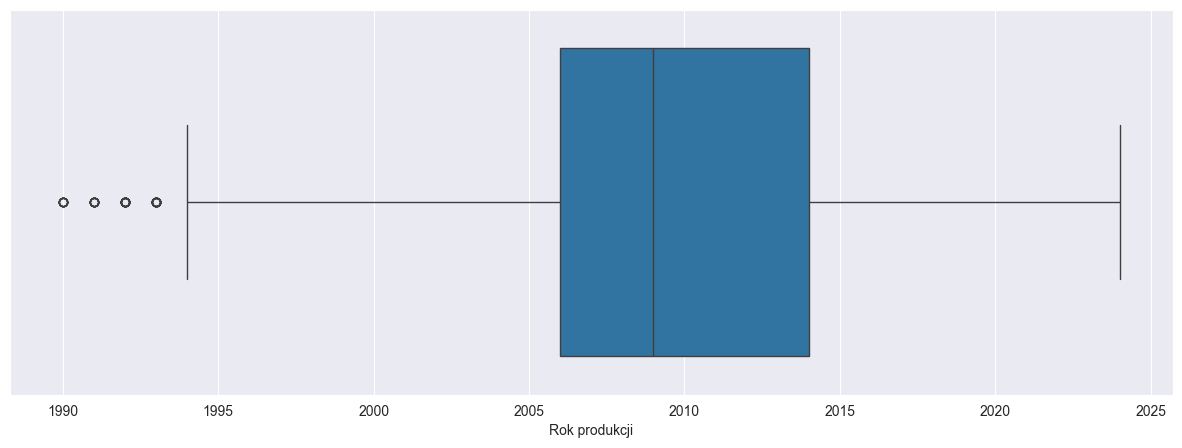

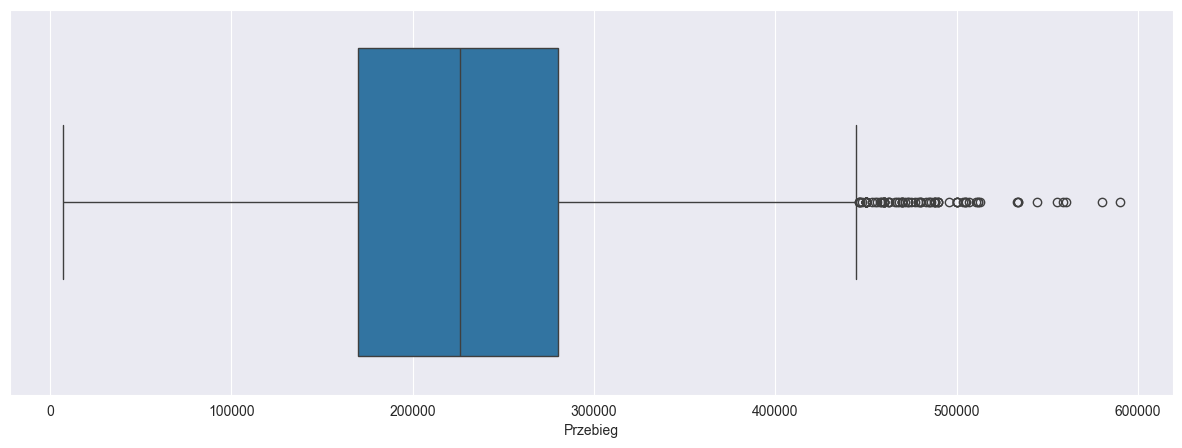

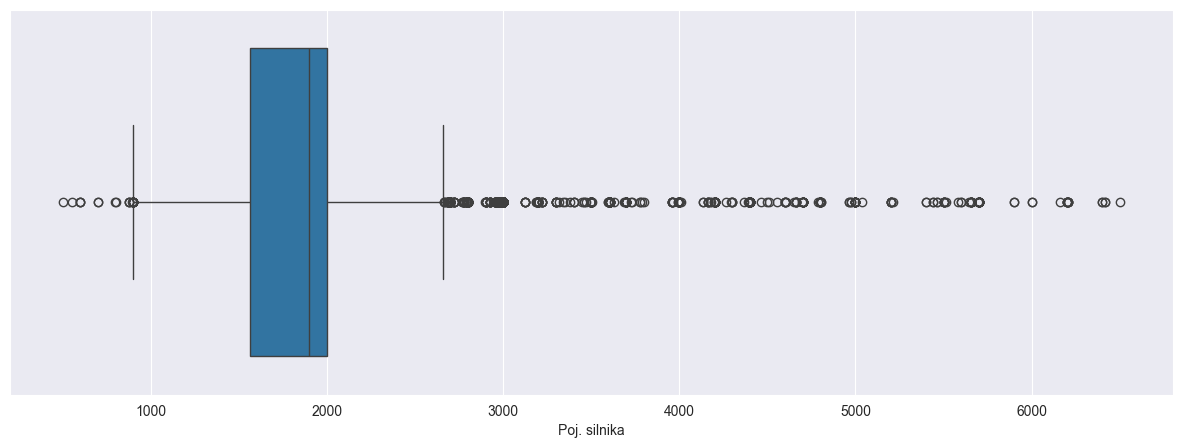

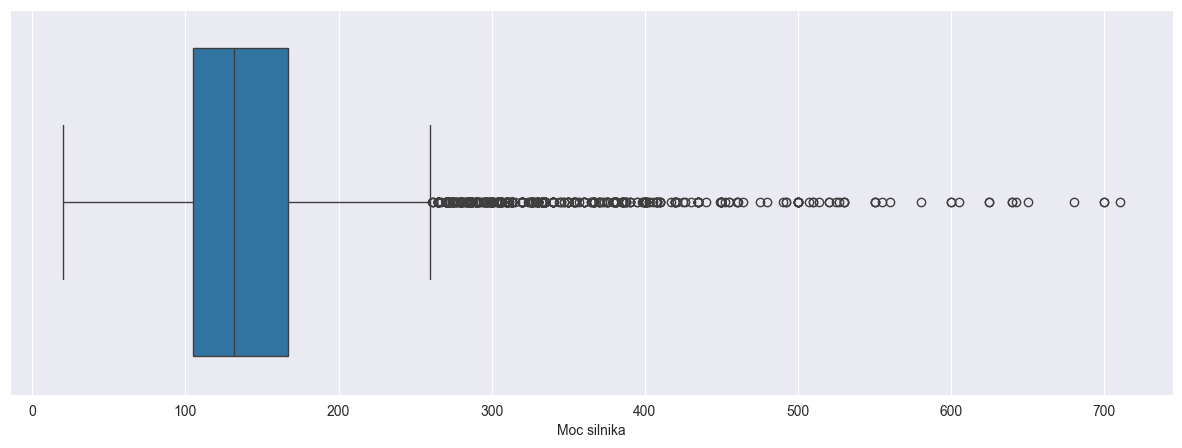

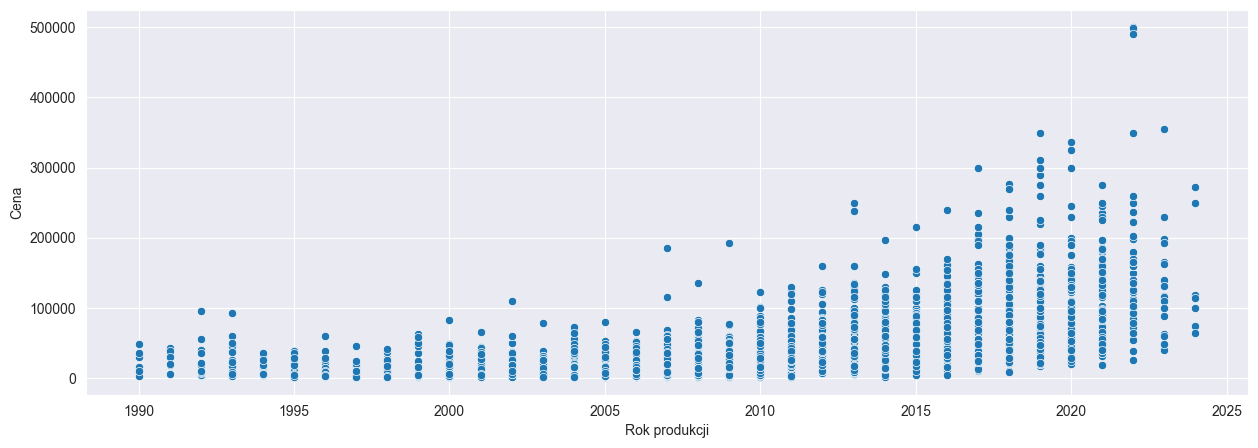

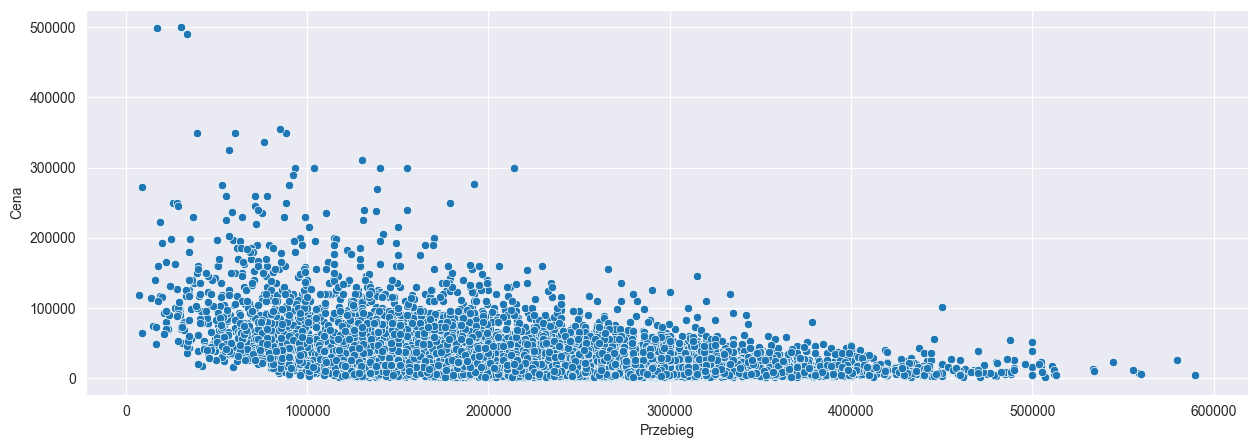

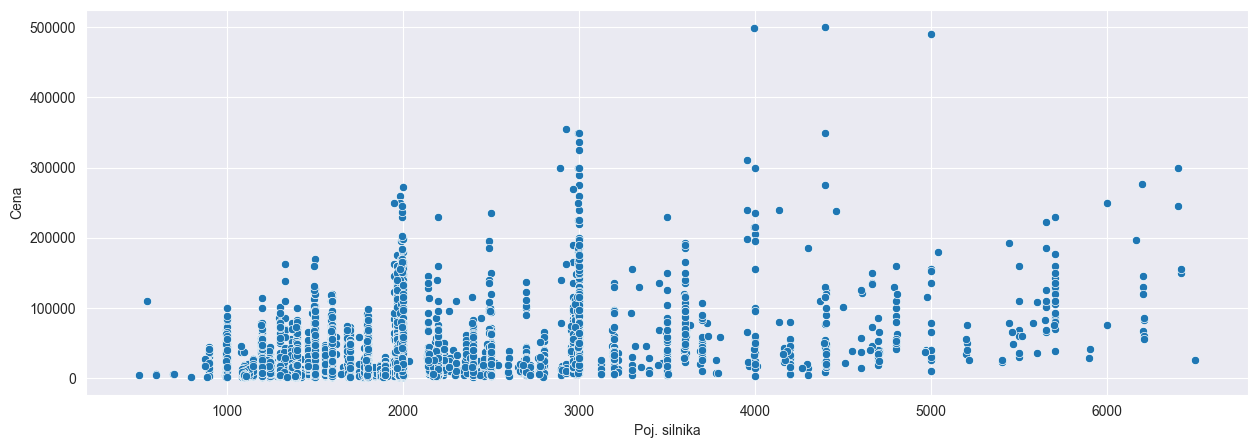

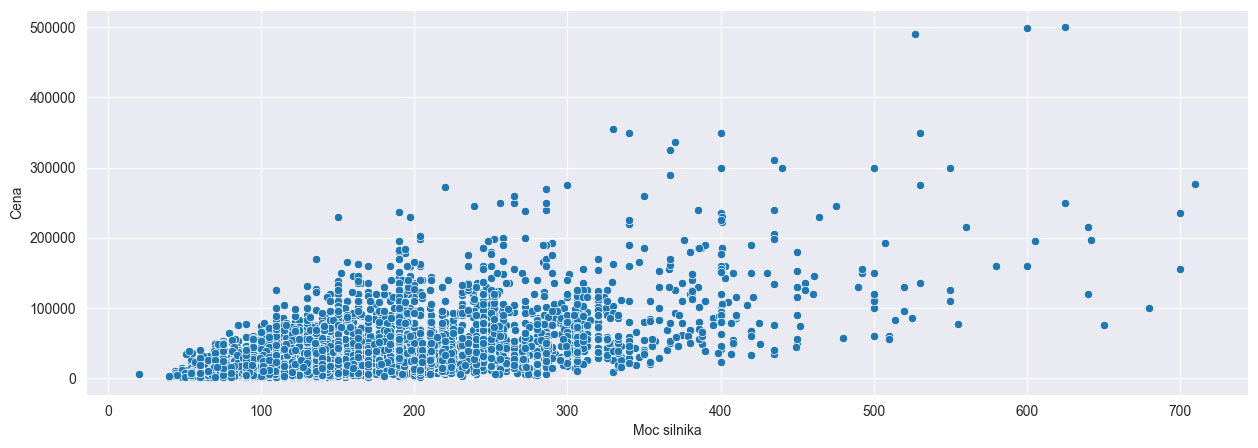

In [49]:
for i in atrybuty_ilosciowe_bez_ceny.columns:
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=atrybuty_ilosciowe_bez_ceny[i])
    plt.show()
for i in atrybuty_ilosciowe_bez_ceny.columns:
    plt.figure(figsize=(15, 5))
    sns.scatterplot(x=atrybuty_ilosciowe_bez_ceny[i], y=atrybuty_ilosciowe["Cena"])
    plt.show()

<Axes: >

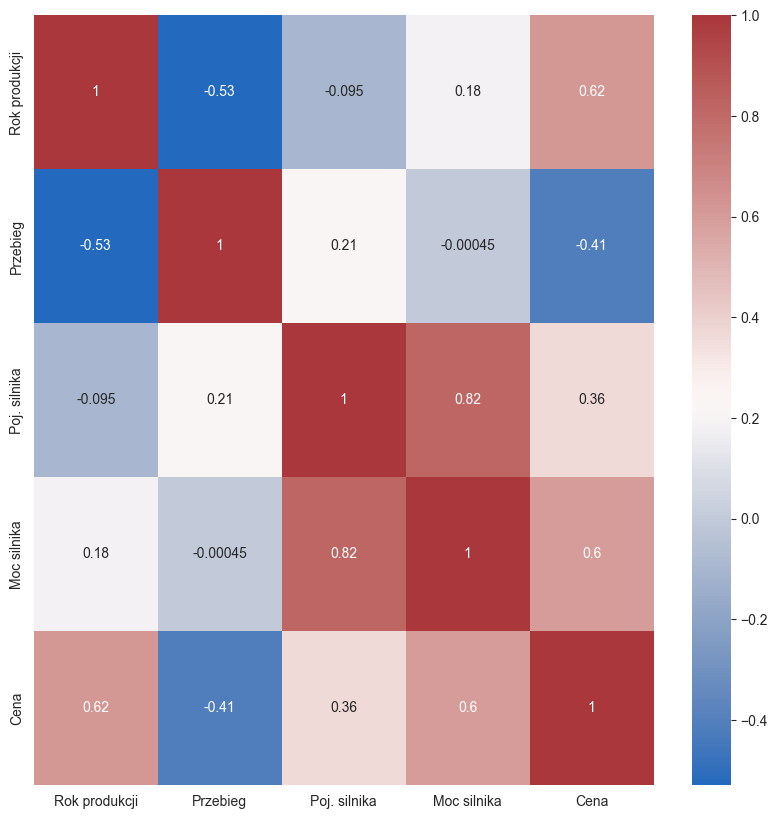

In [50]:
plt.figure(figsize=(10, 10))
sns.heatmap(atrybuty_ilosciowe.corr(), annot=True, cmap="vlag")

In [51]:
atrybuty_kategoryczne = df.select_dtypes(object, bool)
atrybuty_kategoryczne.drop(columns=["Numer VIN", "Tytuł", "Opis", "Link", "Lokalizacja"], inplace=True)
atrybuty_kategoryczne.nunique()


Model                634
Paliwo                 3
Typ nadwozia          10
Kolor                 10
Stan techniczny        2
Skrzynia biegów        2
Kraj pochodzenia      32
Napęd                  6
Kierownica             3
Województwo           16
Rodzaj ogłoszenia      2
Producent             53
Poprawność VIN         3
dtype: int64

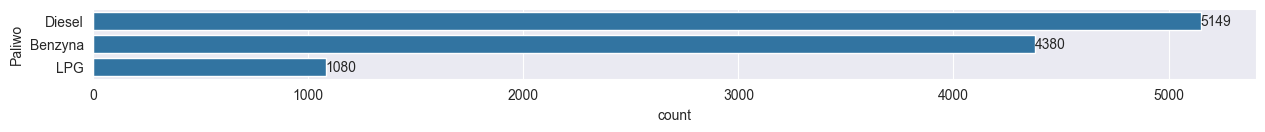

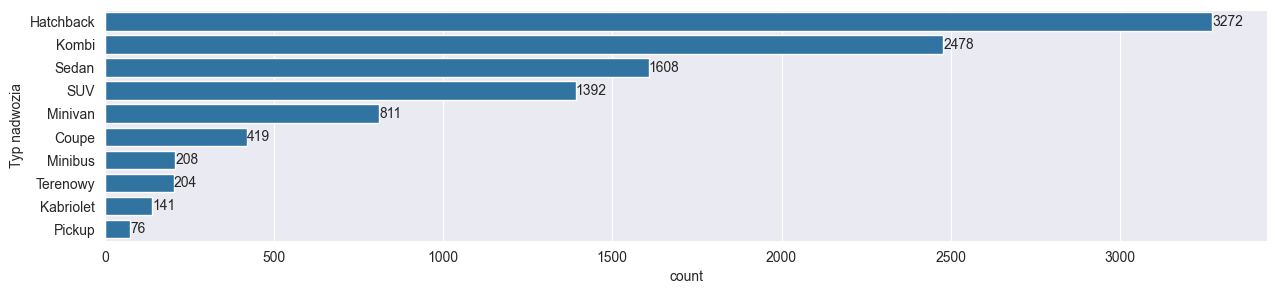

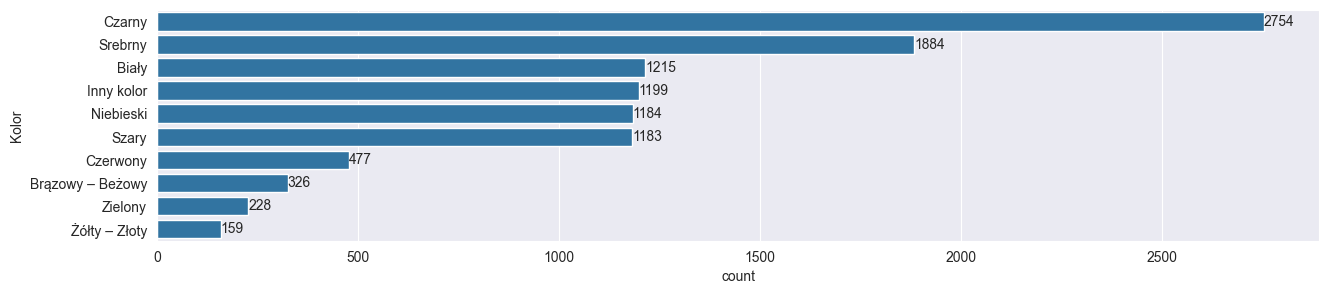

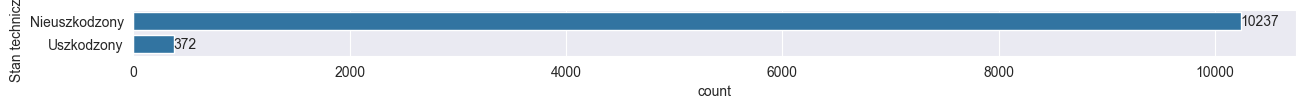

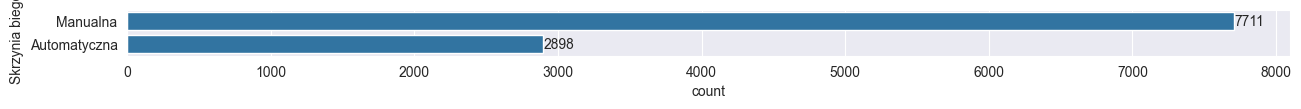

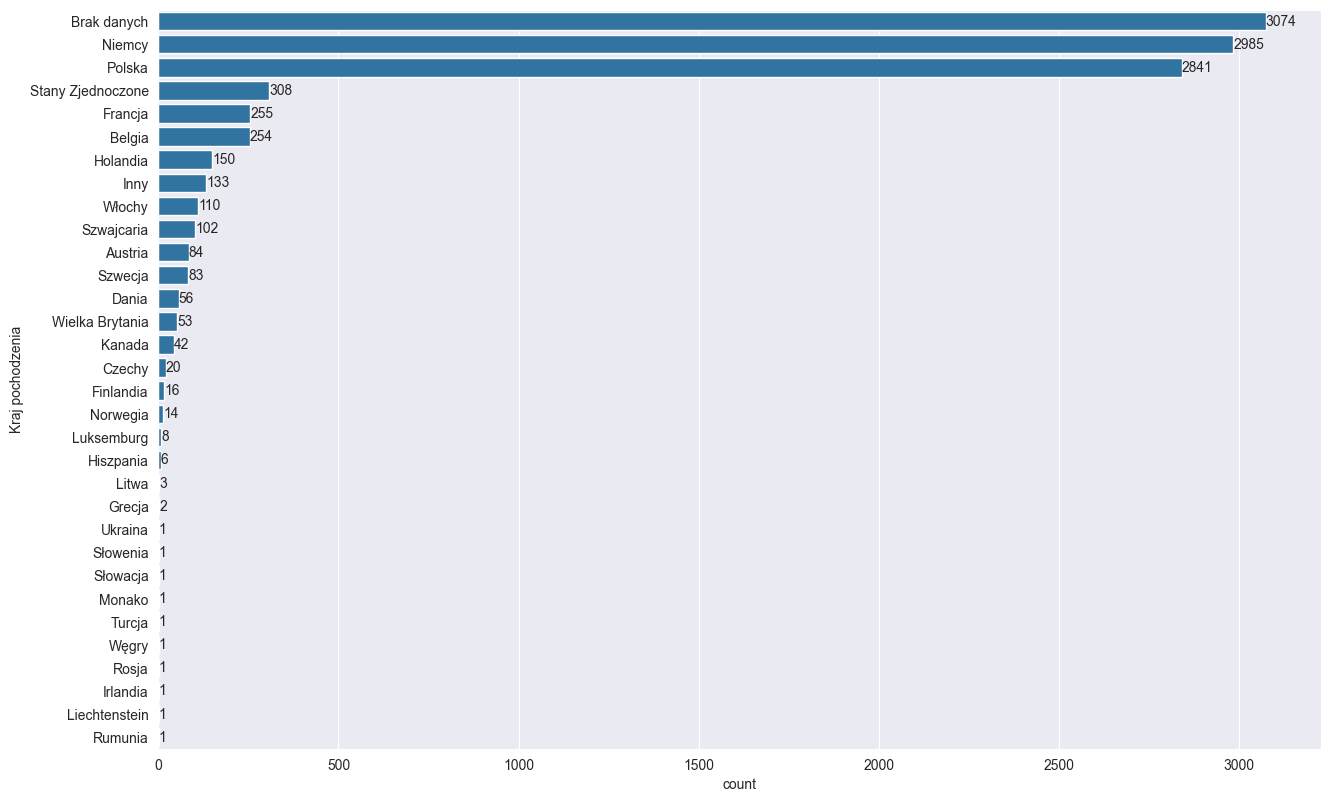

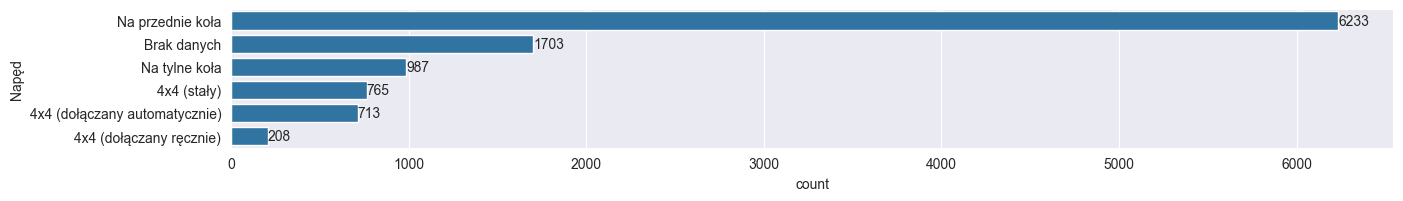

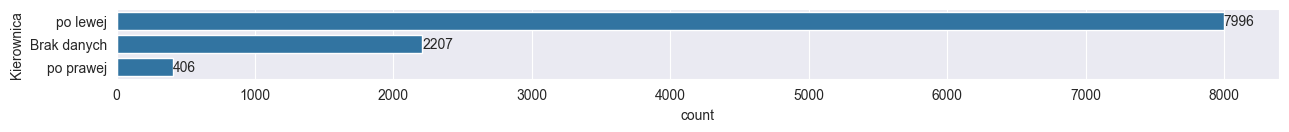

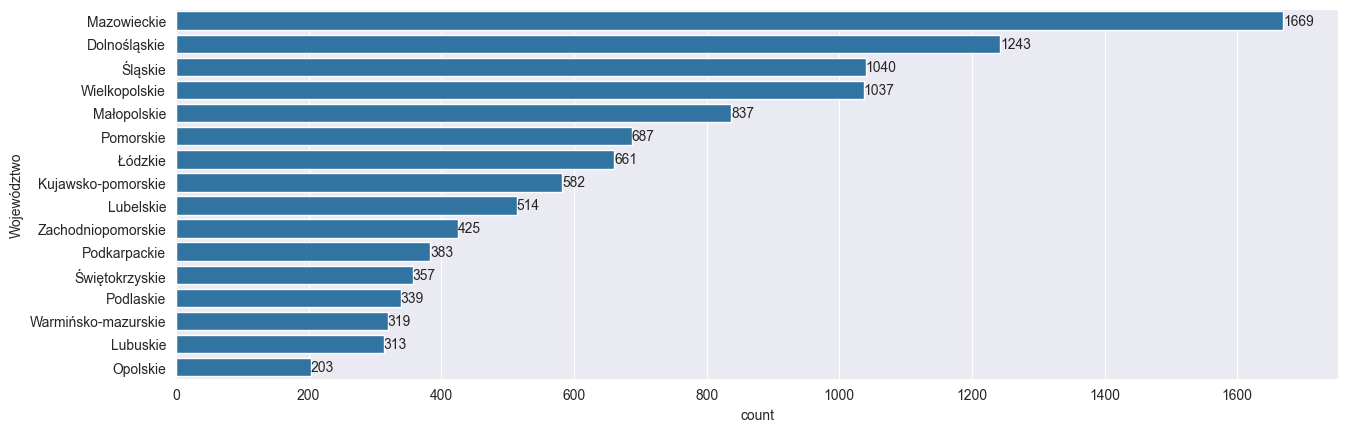

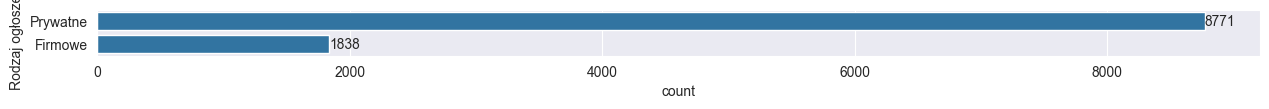

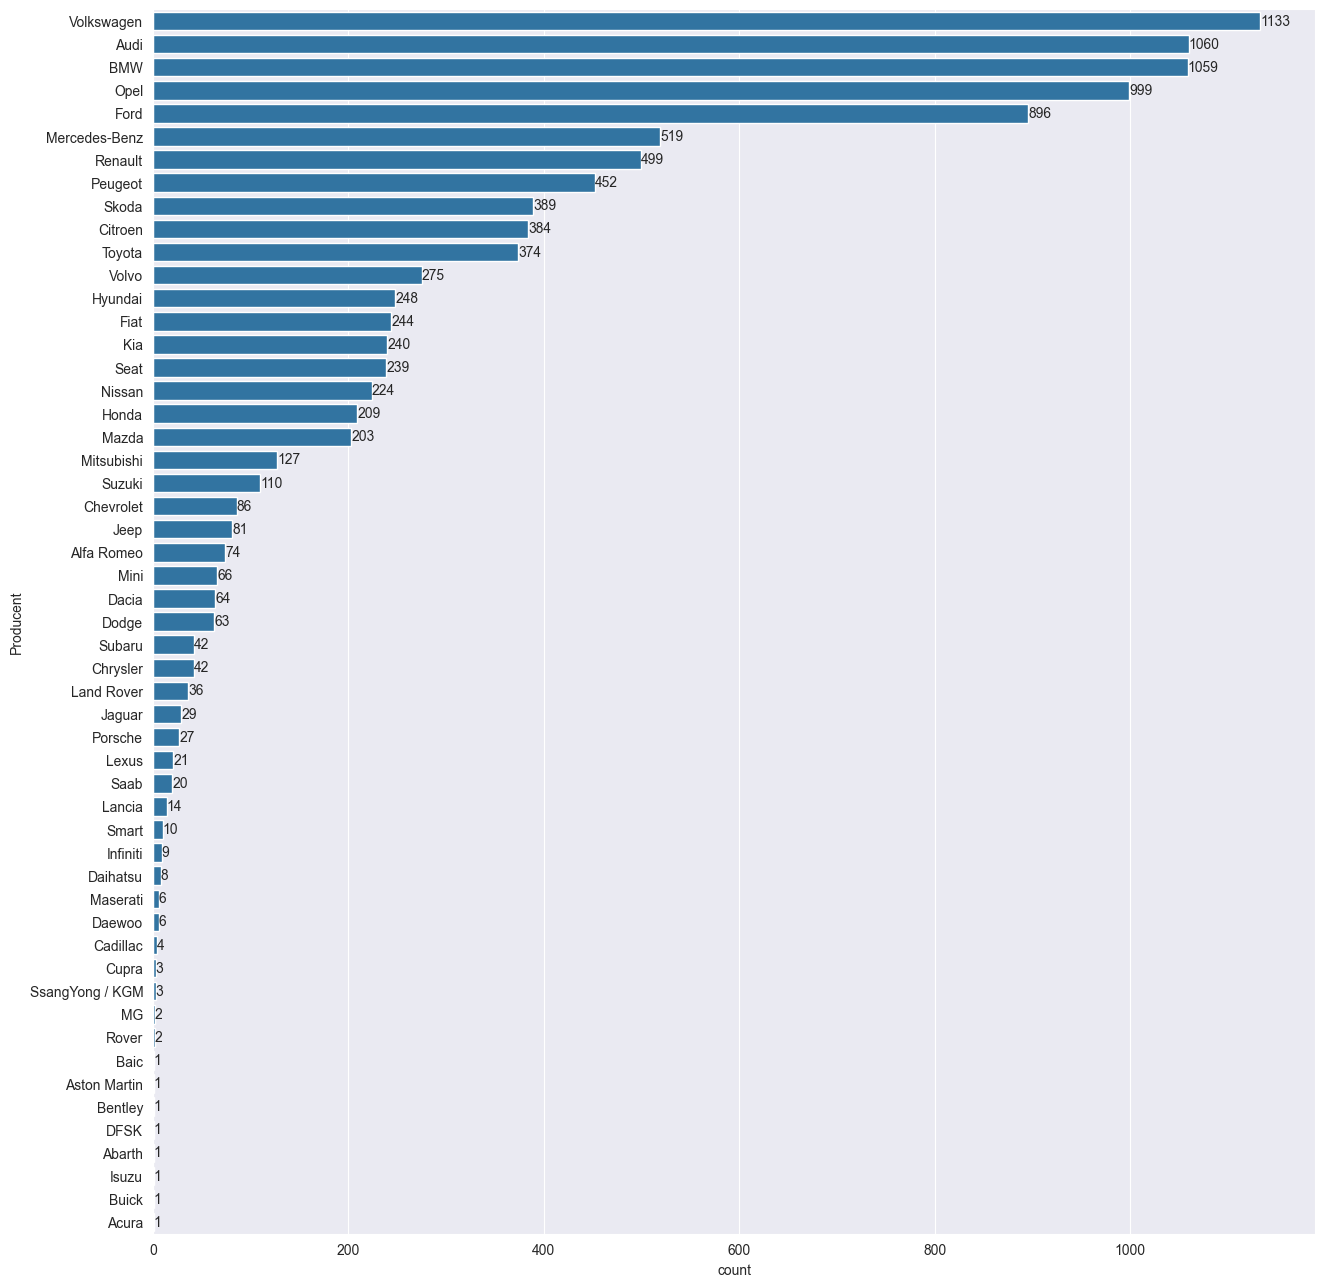

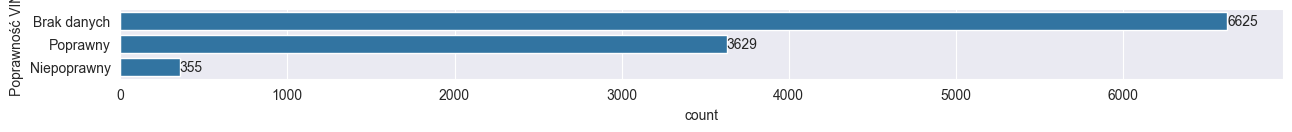

In [52]:
atrybuty_kategoryczne_bez_modeli = atrybuty_kategoryczne.drop(columns=["Model"])
for i in atrybuty_kategoryczne_bez_modeli.columns:
    category_order = atrybuty_kategoryczne_bez_modeli[i].value_counts().index.tolist()
    plt.figure(figsize=(15, 0.3 * atrybuty_kategoryczne_bez_modeli[i].nunique()))
    plot = sns.countplot(atrybuty_kategoryczne_bez_modeli[i], order=category_order)
    plot.bar_label(plot.containers[0])
    plt.show()

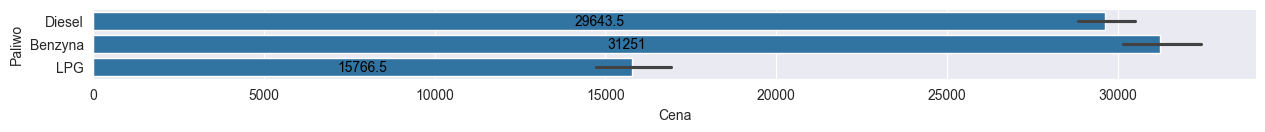

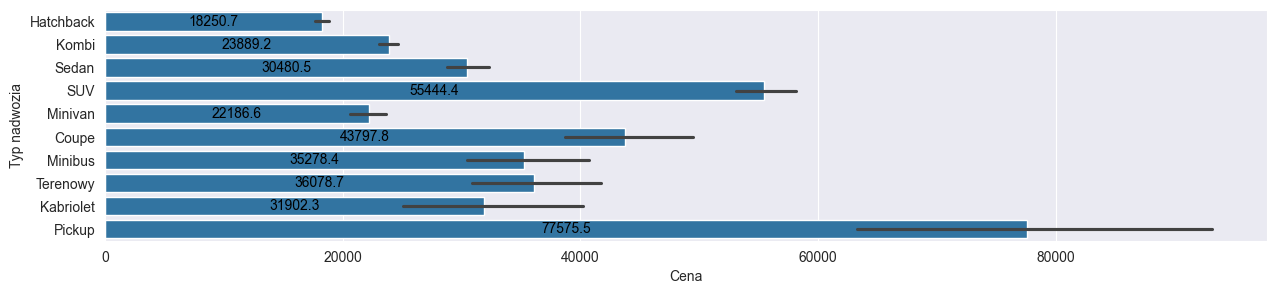

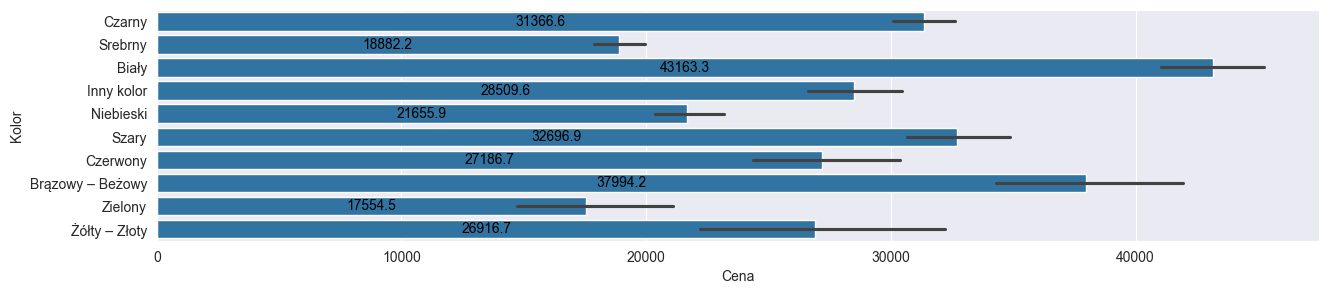

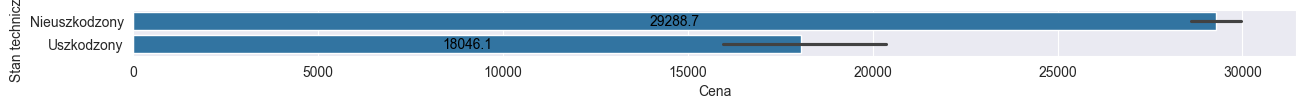

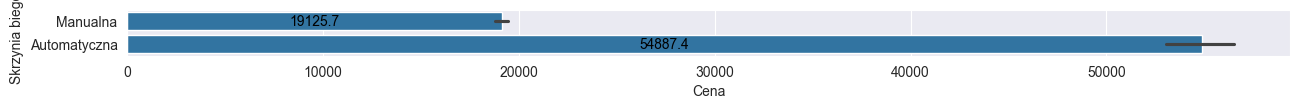

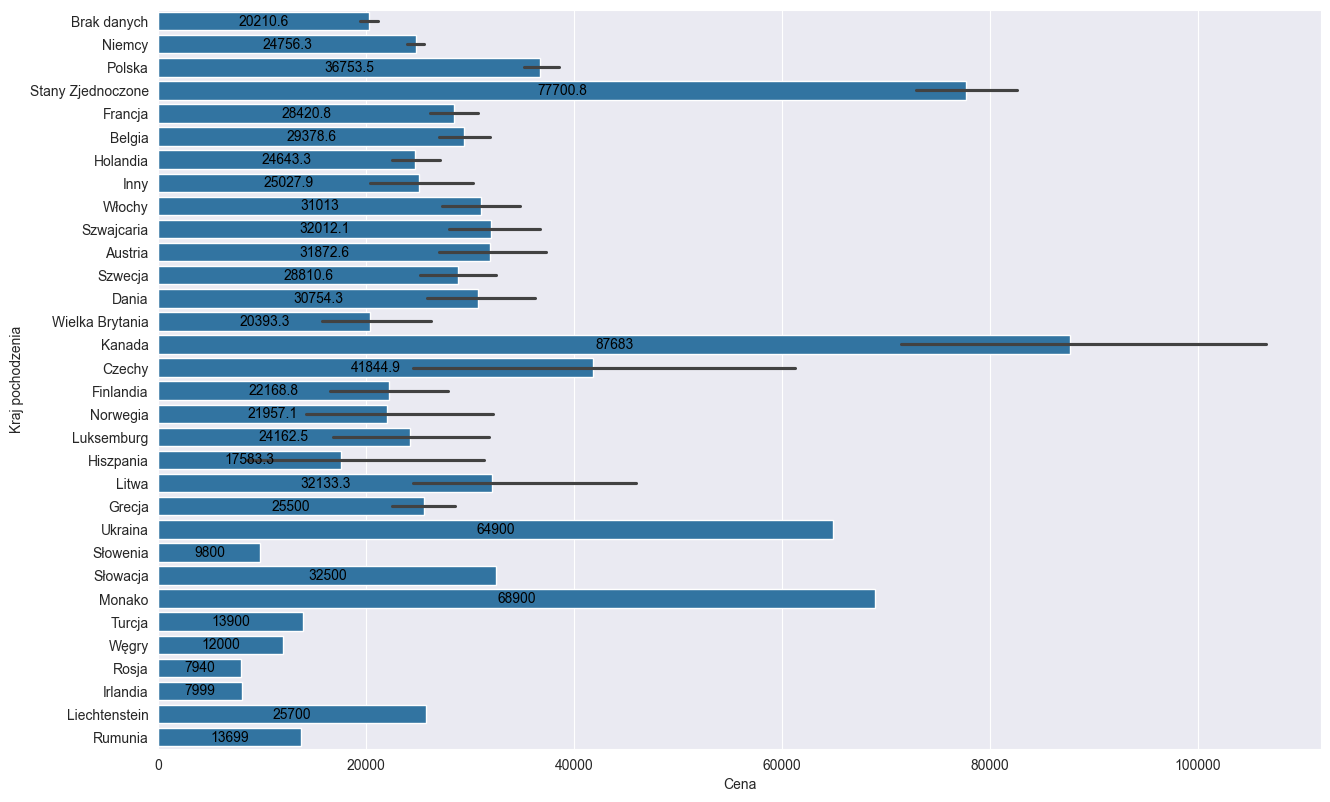

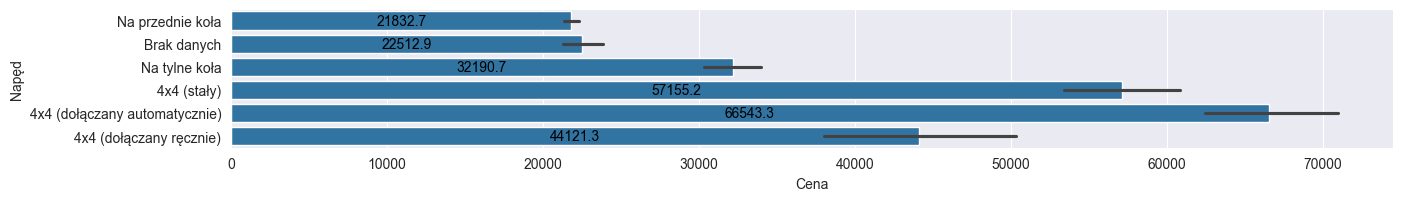

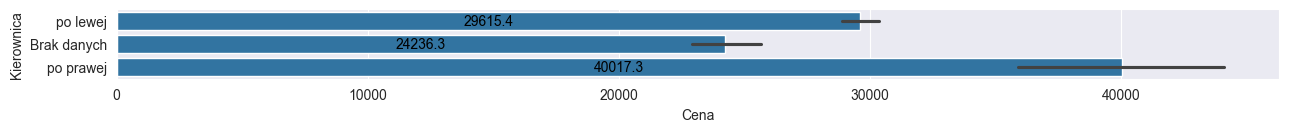

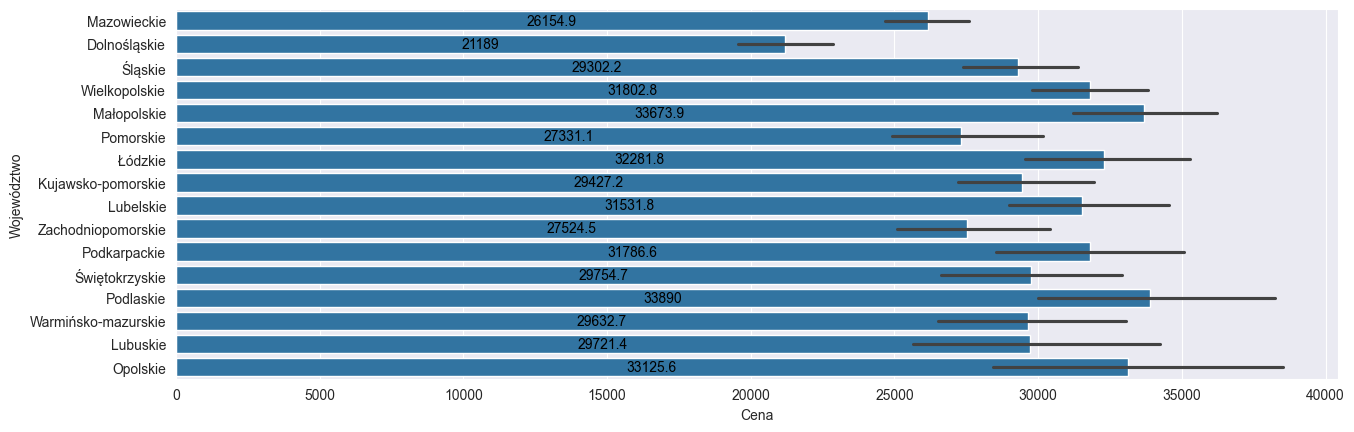

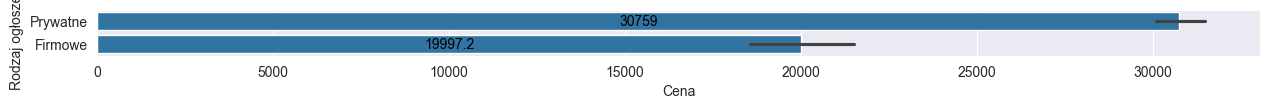

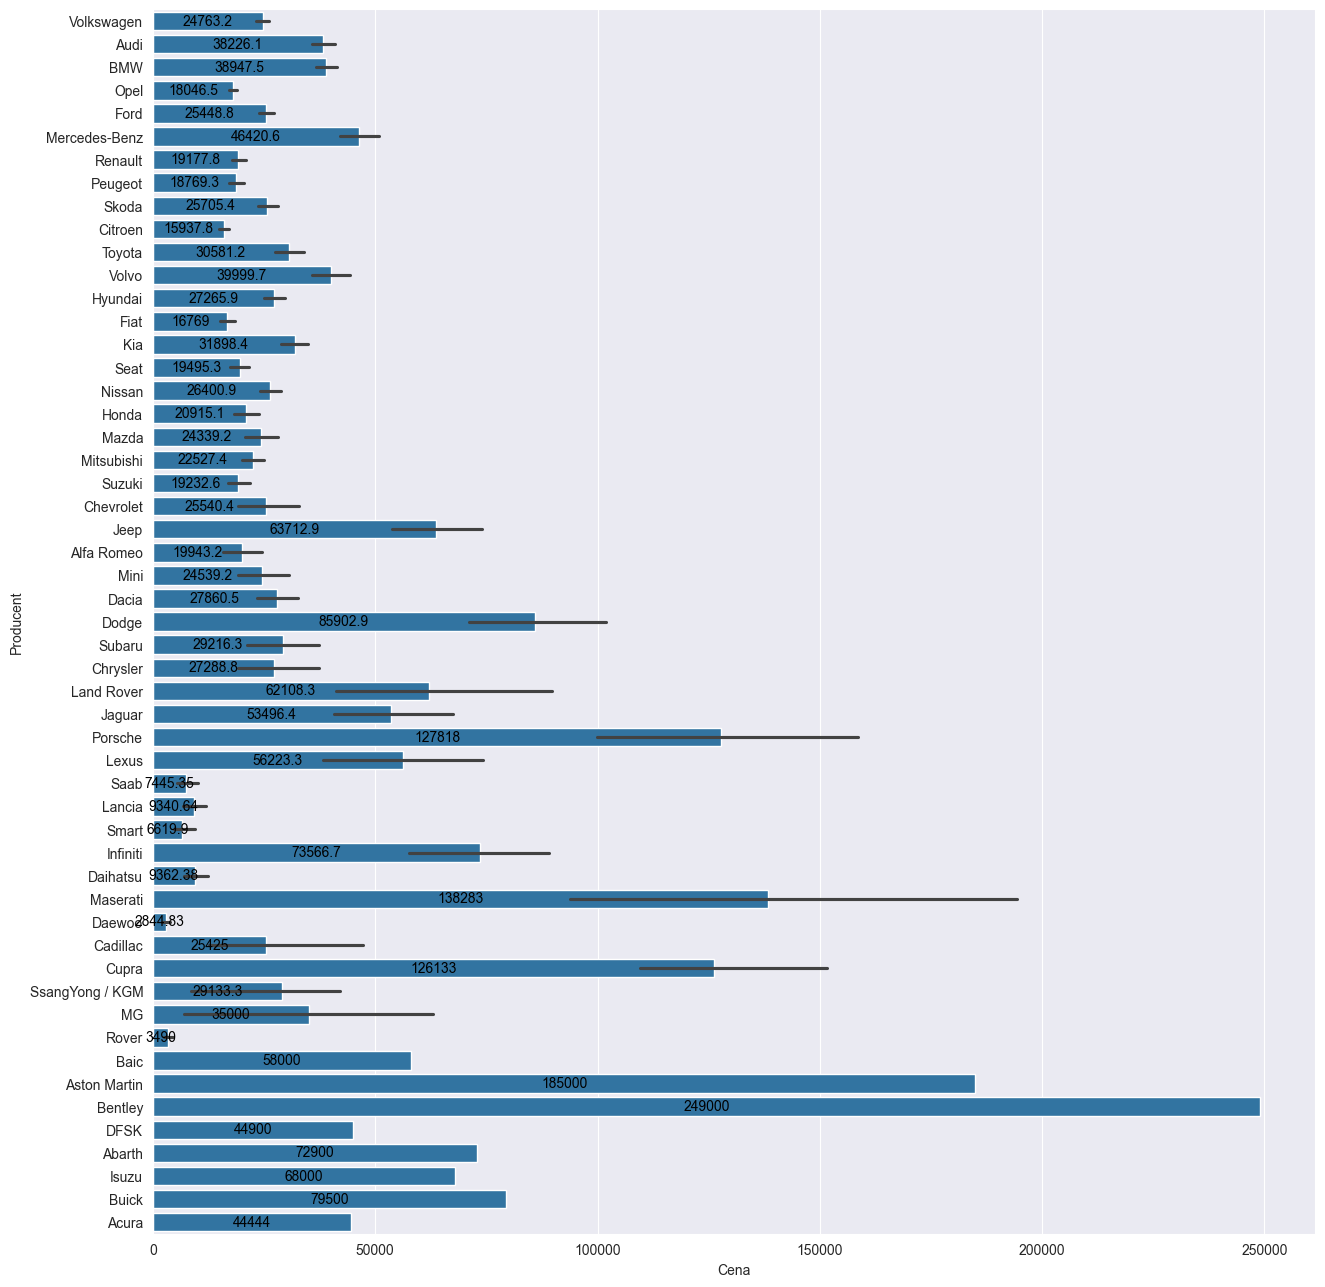

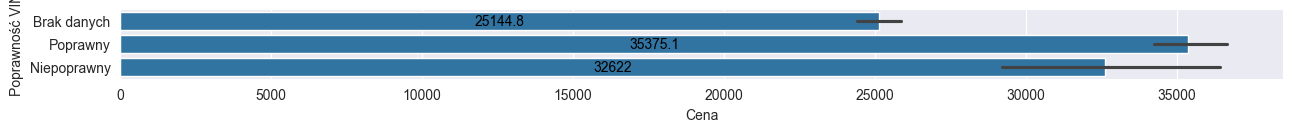

In [53]:
for i in atrybuty_kategoryczne_bez_modeli.columns:
    category_order = atrybuty_kategoryczne_bez_modeli[i].value_counts().index.tolist()
    plt.figure(figsize=(15, 0.3 * atrybuty_kategoryczne_bez_modeli[i].nunique()))
    plot = sns.barplot(data=df, x="Cena", y=i, order=category_order, orient="h")
    plot.bar_label(plot.containers[0], label_type="center", color="black")
    plt.show()

Do analizy:
brak aut uszkodzonych,
pogrupowanie rzadkich producentów i państw pochodzenia,
zamiana rocznika na wiek


    


In [54]:
def wykorzystanie_modelu(model, x_train, x_test, y_train, y_test, title):

    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    print(f"MSE - zbiór uczący: {mean_squared_error(y_train, y_pred_train)}")
    print(f"R^2 - zbiór uczący: {r2_score(y_train, y_pred_train)}")
    print(f"MSE - zbiór testowy: {mean_squared_error(y_test, y_pred_test)}")
    print(f"R^2 - zbiór testowy: {r2_score(y_test, y_pred_test)}")
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_pred_train, color='red', edgecolor='black', alpha=0.2)
    plt.scatter(y_test, y_pred_test, color='deepskyblue', edgecolor='black', alpha=0.2)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green')
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.grid(axis='x', linestyle=':', alpha=0.7)
    plt.xlabel("Rzeczywista cena")
    plt.ylabel("Przewidywana cena")
    plt.title(title)
    plt.show()

def wielokrotne_wykorzystanie_modelu(model_class, model_params, x_train, x_test, y_train, y_test, num_runs):
    mse_scores = []
    r2_scores = []
    
    for random_state in range(num_runs):
        model_params["random_state"] = random_state
        model = model_class(**model_params)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        mse_scores.append(mean_squared_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))
    
    print("Podsumowanie wyników:")
    print(f"Średni MSE: {np.mean(mse_scores)}")
    print(f"Średnie R^2: {np.mean(r2_scores)}")
    print(f"Najlepszy MSE: {np.min(mse_scores)}")
    print(f"Najlepszy R^2: {np.max(r2_scores)}")
    print(f"Najgorszy MSE; {np.max(mse_scores)}")
    print(f"Najgorszy R^2: {np.min(r2_scores)}")
    
def group_rare_values(df, column, threshold):
    make_counts = df[column].value_counts()
    rare_values = make_counts[make_counts < threshold].index.tolist()
    df[column] = df[column].apply(lambda x: "Inny" if x in rare_values else x)
    return df

In [64]:
cars = df[df["Stan techniczny"]!="Uszkodzony"].copy()
cars.drop(columns=["Numer VIN", "Tytuł", "Opis", "Link", "Lokalizacja", "Stan techniczny"], inplace=True)
group_rare_values(cars, "Producent", 10)
group_rare_values(cars, "Kraj pochodzenia", 15)
cars = pd.get_dummies(cars, columns=['Model', 'Paliwo', 'Typ nadwozia', 'Kolor', 'Skrzynia biegów', 'Kraj pochodzenia', 'Napęd', 'Kierownica', 'Województwo', 'Rodzaj ogłoszenia', 'Producent', 'Poprawność VIN'])
#cars.drop(columns=['Poprawność VIN', 'Producent', 'Rodzaj ogłoszenia', 'Województwo', 'Kierownica', 'Napęd', 'Kraj pochodzenia', 'Skrzynia biegów', 'Kolor', 'Typ nadwozia', 'Paliwo', 'Model'], inplace=True)


#['Model', 'Paliwo', 'Typ nadwozia', 'Kolor', 'Skrzynia biegów', 'Kraj pochodzenia', 'Napęd', 'Kierownica', 'Województwo', 'Rodzaj ogłoszenia', 'Producent', 'Poprawność VIN'])

MSE - zbiór uczący: 96064357.03769428
R^2 - zbiór uczący: 0.9098599701676382
MSE - zbiór testowy: 280794353.08380735
R^2 - zbiór testowy: 0.7793424564009439


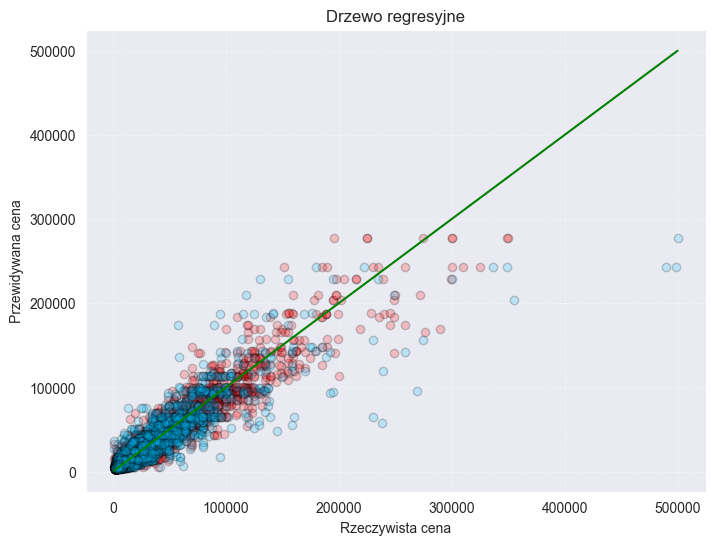

Podsumowanie wyników:
Średni MSE: 280846338.7457735
Średnie R^2: 0.7793016043384082
Najlepszy MSE: 280615474.1679557
Najlepszy R^2: 0.7794830254036321
Najgorszy MSE; 281002885.3974982
Najgorszy R^2: 0.7791785847717793


In [65]:
x = cars.drop(columns=["Cena"])
y = cars["Cena"]
depth = 10
samples = 5
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=samples, random_state=42)
wykorzystanie_modelu(model, x_train, x_test, y_train, y_test, "Drzewo regresyjne")
wielokrotne_wykorzystanie_modelu(model_class=DecisionTreeRegressor,model_params={"max_depth": depth, 'min_samples_leaf' : samples}, 
                                 x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,num_runs=10)